In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure visualizations directory exists
os.makedirs("../visualizations", exist_ok=True)

# Load dataset
df = pd.read_csv("../data/cleaned_ecom_transactions.csv")

# Display first few rows
df.head()

,Transaction ID,Customer ID,Transaction Date,Product Category,Price,Quantity,Payment Method,Shipping Status,Customer Rating
0,539db039-37c0-4f91-b6fa-079af50ee7fd,c3b9ac53-4a42-46ac-9850-f46605e4e94a,2024-04-13,Electronics,370.81,3.0,PayPal,Shipped,2.0
1,2c37f0fc-0ca2-4f93-97bf-659fa96788f1,1b2acf0b-cb58-44c4-a272-6f01d5b0116e,2023-07-10,Sports,119.51,4.0,Debit Card,Delivered,1.0
2,037d7859-03e2-45a0-ad46-80d8ab92fbd4,4a636dcd-686b-45fc-ba6e-54056dc273fb,2025-01-29,Electronics,219.32,2.0,PayPal,Shipped,2.0
3,84d6a5ff-a05c-4d7c-9fb5-1106a1594a97,b2cc871e-3d07-4136-bea9-782d5a6e8dc9,2023-03-25,Books,76.09,1.0,Debit Card,Pending,3.0
4,5c899683-d731-4c29-a7c0-715f5c8368da,d3a7f85b-0d5d-42b2-bae7-d221da5d861b,2023-09-13,Home & Kitchen,59.01,1.0,PayPal,Shipped,3.0


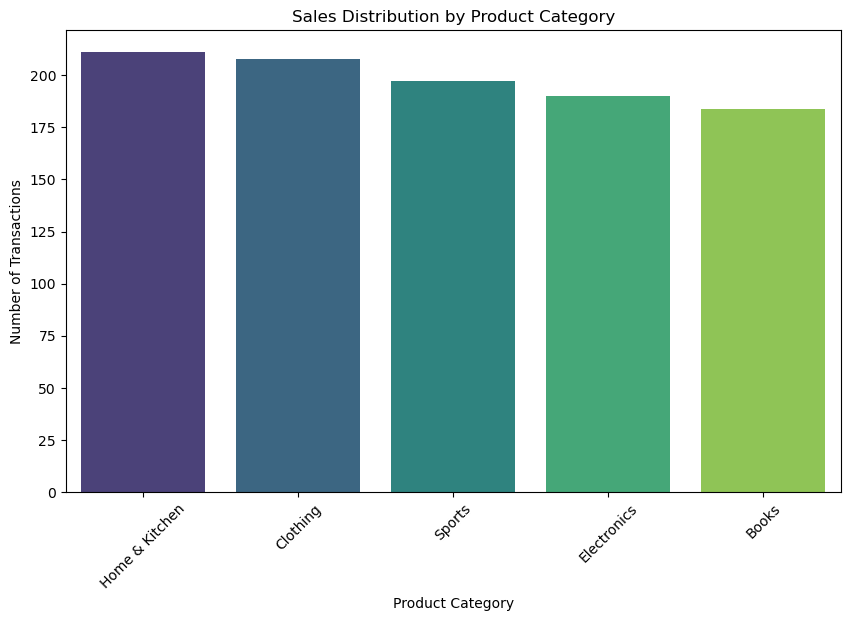

In [8]:
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a bar chart showing transaction count per product category
sns.barplot(x=df["Product Category"].value_counts().index, 
            y=df["Product Category"].value_counts().values, 
            hue=df["Product Category"].value_counts().index, 
            palette="viridis", 
            legend=False)  # Hide legend since hue is just for coloring

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.title("Sales Distribution by Product Category")

# Save the plot as an image
plt.savefig("../visualizations/sales_by_category.png")

# Show the plot
plt.show()

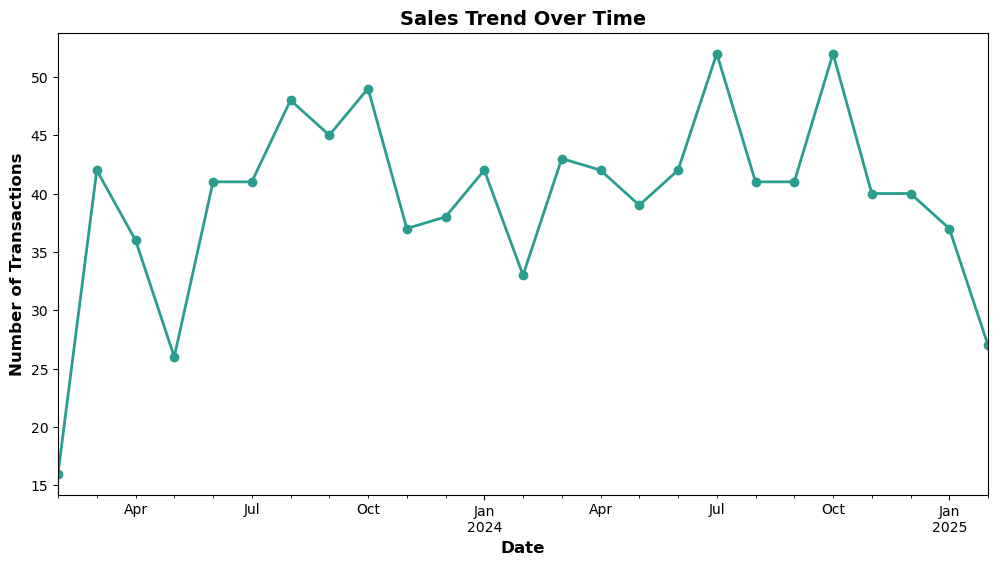

In [9]:
# Convert transaction date to datetime format for time-series analysis
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

# Group transactions by month and count occurrences
df_trend = df.groupby(df["Transaction Date"].dt.to_period("M")).size()

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the sales trend over time with a more pleasing color
df_trend.plot(kind="line", marker="o", color="#2a9d8f", linestyle="-", linewidth=2, markersize=6)

# Add labels and title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Number of Transactions", fontsize=12, fontweight="bold")
plt.title("Sales Trend Over Time", fontsize=14, fontweight="bold")

# Save the plot as an image
plt.savefig("../visualizations/sales_trend.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

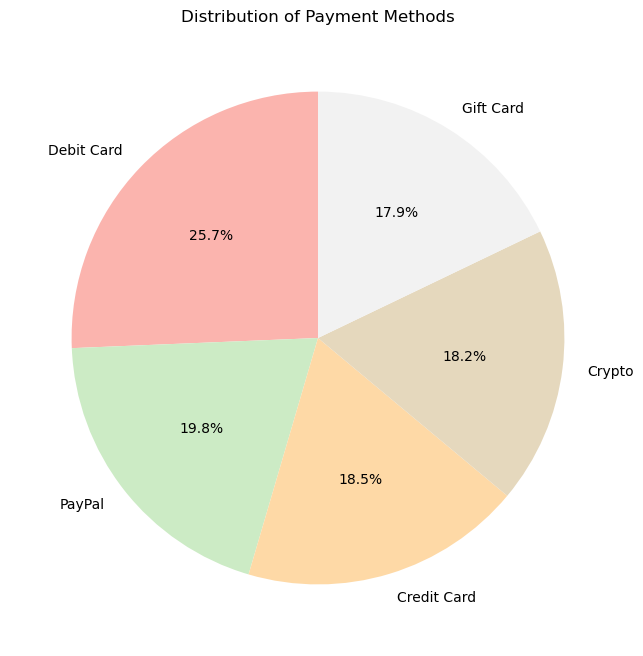

In [10]:
# Set figure size
plt.figure(figsize=(8, 8))

# Create a pie chart showing payment method distribution
df["Payment Method"].value_counts().plot(kind="pie", 
                                         autopct="%1.1f%%", 
                                         startangle=90, 
                                         colormap="Pastel1")

# Set title
plt.title("Distribution of Payment Methods")

# Remove default y-label for a cleaner look
plt.ylabel("")

# Save the plot as an image
plt.savefig("../visualizations/payment_methods.png")

# Show the plot
plt.show()

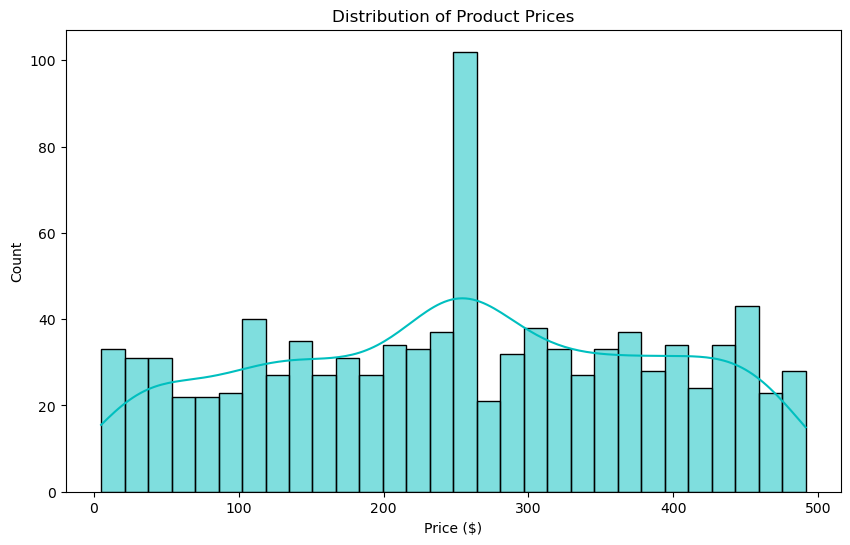

In [11]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create a histogram with Kernel Density Estimate (KDE) for price distribution
sns.histplot(df["Price"], bins=30, kde=True, color="c")

# Add labels and title
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of Product Prices")

# Save the plot as an image
plt.savefig("../visualizations/price_distribution.png")

# Show the plot
plt.show()

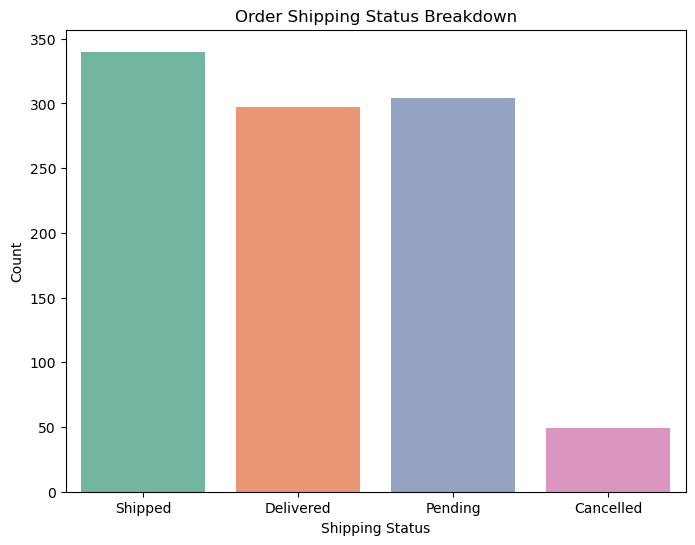

In [12]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create a count plot for shipping status with explicit hue assignment
sns.countplot(x=df["Shipping Status"], hue=df["Shipping Status"], palette="Set2", legend=False)

# Add labels and title
plt.xlabel("Shipping Status")
plt.ylabel("Count")
plt.title("Order Shipping Status Breakdown")

# Save the plot as an image
plt.savefig("../visualizations/shipping_status.png")

# Show the plot
plt.show()